<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/use_flower_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

In [3]:
photos = np.load('/content/drive/MyDrive/pic_train/VN_banknotes_photos.npy')
labels = np.load('/content/drive/MyDrive/pic_train/VN_banknotes_labels.npy')

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(117, 150, 150, 3) (30, 150, 150, 3)
(117,) (30,)


In [17]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,7)
y_test = to_categorical(y_test,7)

print(y_train.shape,y_test.shape)

(117, 7) (30, 7)


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
])

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [20]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
2/2 [==============================] - 1s 60ms/step - loss: 2.9740 - accuracy: 0.1282
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 1.8566 - accuracy: 0.1368
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 1.8411 - accuracy: 0.2393
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 1.8300 - accuracy: 0.1880
Epoch 5/20
2/2 [==============================] - 0s 38ms/step - loss: 1.7656 - accuracy: 0.2650
Epoch 6/20
2/2 [==============================] - 0s 40ms/step - loss: 1.7070 - accuracy: 0.2650
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 1.6662 - accuracy: 0.2821
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 1.6191 - accuracy: 0.3504
Epoch 9/20
2/2 [==============================] - 0s 42ms/step - loss: 1.5509 - accuracy: 0.4188
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 1.4628 - accuracy: 0.5214
Epoch 11/20
2/2 [============

In [21]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/money.h5')

In [22]:
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/test1.h5')

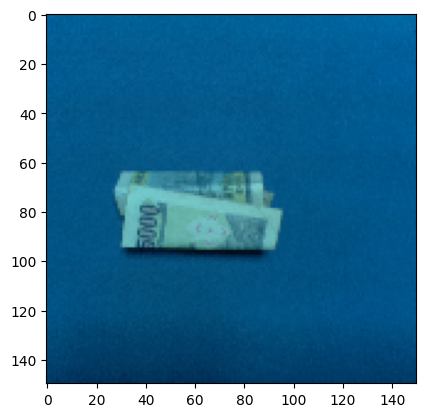

so: [0. 1. 0. 0. 0. 0. 0.]


In [35]:
digit = x_test[6]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[6])

In [38]:
classes = ['namNghin', 'muoiNghin', 'haiMuoiNghin', 'namMuoiNghin', 'motTramNghin',
           'namTramNghin','none']
img = x_test[6]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))

1/1 [==============================] - 0s 27ms/step
predict:  none [6.5729471e-09 4.9501739e-04 7.2346097e-03 2.8090458e-03 1.1944166e-04
 3.4908018e-01 6.3634098e-01 3.8311777e-03 3.5110861e-05 2.4281287e-06
 5.2065614e-05]
